In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score, accuracy_score
from statistics import harmonic_mean
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, train_test_split
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from tensorflow.keras.models import Sequential #importing Sequential layer
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
# representation of model layers
from tensorflow.keras.utils import plot_model

In [ ]:
train = pd.read_csv("kdd_train.csv")
test = pd.read_csv("kdd_test.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.shape

(125973, 42)

In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [ ]:
test.shape

(22544, 42)

In [ ]:
train.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
cats = list(train.select_dtypes(include='object').columns.values)
cats

['protocol_type', 'service', 'flag', 'labels']

In [ ]:
train["protocol_type"] = train["protocol_type"].astype('category')
train["service"] = train["service"].astype('category')
train["flag"] = train["flag"].astype('category')
train["labels"] = train["labels"].astype('category')
test["protocol_type"] = test["protocol_type"].astype('category')
test["service"] = test["service"].astype('category')
test["flag"] = test["flag"].astype('category')
test["labels"] = test["labels"].astype('category')



In [ ]:
train['labels'].value_counts(), test['labels'].value_counts()


(normal             67343
 neptune            41214
 satan               3633
 ipsweep             3599
 portsweep           2931
 smurf               2646
 nmap                1493
 back                 956
 teardrop             892
 warezclient          890
 pod                  201
 guess_passwd          53
 buffer_overflow       30
 warezmaster           20
 land                  18
 imap                  11
 rootkit               10
 loadmodule             9
 ftp_write              8
 multihop               7
 phf                    4
 perl                   3
 spy                    2
 Name: labels, dtype: int64, normal             11245
 neptune             6654
 satan                698
 smurf                540
 ipsweep              479
 guess_passwd         411
 portsweep            371
 mscan                310
 warezmaster          279
 apache2              228
 back                 227
 processtable         211
 nmap                 206
 warezclient          107
 teardrop 

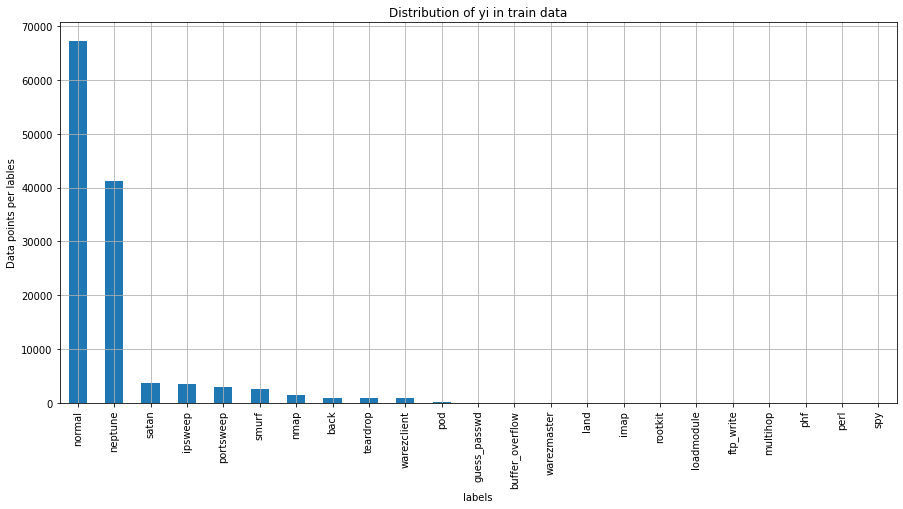

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = train['labels'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('labels')
plt.ylabel('Data points per lables')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [ ]:
df_train = train.copy()
df_test = test.copy()

In [ ]:
train[cats] = train[cats].apply(lambda x: x.cat.codes)
test[cats] = test[cats].apply(lambda x: x.cat.codes)


In [ ]:
enc = OrdinalEncoder()
enc.fit(train[['protocol_type','service','flag']])
train[['protocol_type','service','flag']] = enc.transform(train[['protocol_type','service','flag']])

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1.0,20.0,9.0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2.0,44.0,9.0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1.0,49.0,5.0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1.0,24.0,9.0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1.0,24.0,9.0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [ ]:
X=train.drop(['labels'], axis=1)
y=train['labels']

In [ ]:
td=chi2(X, y)
print(td[0])

[6.66222035e+08 8.36458475e+03 2.09526973e+05 7.92604404e+04
 1.48197070e+11 8.99826760e+10 9.06792264e+04 3.55373059e+05
 1.10219991e+04 3.78381716e+05 4.84377513e+04 4.08918661e+04
 3.19877755e+04 1.47764189e+04 5.70428355e+02 3.70034612e+04
 7.61510443e+03 1.59089095e+04 1.94840687e+03            nan
 8.70617585e-01 1.13165561e+04 1.10590608e+07 1.22404857e+07
 6.47714154e+04 6.55820198e+04 2.66173733e+04 2.69290569e+04
 3.22479288e+04 2.32778581e+04 2.37542578e+04 2.47169802e+06
 7.74459596e+06 3.24617982e+04 2.38525192e+04 3.93504338e+04
 3.10160105e+04 6.46178726e+04 6.69249553e+04 1.91714534e+04
 2.67982444e+04]


In [ ]:
fscore=pd.Series(td[0])
fscore.index = X.columns
fscore.sort_index(ascending=False).index[:20]

Index(['wrong_fragment', 'urgent', 'su_attempted', 'srv_serror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes',
       'service', 'serror_rate', 'same_srv_rate', 'root_shell', 'rerror_rate',
       'protocol_type', 'num_shells', 'num_root', 'num_outbound_cmds',
       'num_file_creations', 'num_failed_logins', 'num_compromised'],
      dtype='object')

In [ ]:
x_kb=train[['wrong_fragment', 'urgent', 'su_attempted', 'srv_serror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes',
       'service', 'serror_rate', 'same_srv_rate', 'root_shell', 'rerror_rate',
       'protocol_type', 'num_shells', 'num_root', 'num_outbound_cmds',
       'num_file_creations', 'num_failed_logins', 'num_compromised']]

In [ ]:
x_kb['labels']=train['labels']

<ipython-input-22-0d6f6cb91204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_kb['labels']=train['labels']


In [ ]:
train['labels']

0         11
1         11
2          9
3         11
4         11
          ..
125968     9
125969    11
125970    11
125971     9
125972    11
Name: labels, Length: 125973, dtype: int8

In [ ]:
x_kb

,wrong_fragment,urgent,su_attempted,srv_serror_rate,srv_rerror_rate,srv_diff_host_rate,srv_count,src_bytes,service,serror_rate,...,root_shell,rerror_rate,protocol_type,num_shells,num_root,num_outbound_cmds,num_file_creations,num_failed_logins,num_compromised,labels
0,0,0,0,0.0,0.0,0.00,2,491,20.0,0.0,...,0,0.0,1.0,0,0,0,0,0,0,11
1,0,0,0,0.0,0.0,0.00,1,146,44.0,0.0,...,0,0.0,2.0,0,0,0,0,0,0,11
2,0,0,0,1.0,0.0,0.00,6,0,49.0,1.0,...,0,0.0,1.0,0,0,0,0,0,0,9
3,0,0,0,0.2,0.0,0.00,5,232,24.0,0.2,...,0,0.0,1.0,0,0,0,0,0,0,11
4,0,0,0,0.0,0.0,0.09,32,199,24.0,0.0,...,0,0.0,1.0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,1.0,0.0,0.00,25,0,49.0,1.0,...,0,0.0,1.0,0,0,0,0,0,0,9
125969,0,0,0,0.0,0.0,0.00,2,105,49.0,0.0,...,0,0.0,2.0,0,0,0,0,0,0,11
125970,0,0,0,0.0,0.0,0.00,1,2231,54.0,0.0,...,0,0.0,1.0,0,0,0,0,0,0,11
125971,0,0,0,1.0,0.0,0.00,8,0,30.0,1.0,...,0,0.0,1.0,0,0,0,0,0,0,9


In [ ]:
x_kb.labels.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [ ]:
chi2_selector = SelectKBest(chi2, k=20)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)


[[ 0.   20.    9.   ...  0.17  0.    0.  ]
 [ 0.   44.    9.   ...  0.88  0.    0.  ]
 [ 0.   49.    5.   ...  0.    1.    1.  ]
 ...
 [ 0.   54.    9.   ...  0.    0.72  0.  ]
 [ 0.   30.    5.   ...  0.    1.    1.  ]
 [ 0.   20.    9.   ...  0.3   0.    0.  ]]
Original number of features: (125973, 41)
Reduced number of features: (125973, 20)


In [ ]:
X_kbest

array([[ 0.  , 20.  ,  9.  , ...,  0.17,  0.  ,  0.  ],
       [ 0.  , 44.  ,  9.  , ...,  0.88,  0.  ,  0.  ],
       [ 0.  , 49.  ,  5.  , ...,  0.  ,  1.  ,  1.  ],
       ...,
       [ 0.  , 54.  ,  9.  , ...,  0.  ,  0.72,  0.  ],
       [ 0.  , 30.  ,  5.  , ...,  0.  ,  1.  ,  1.  ],
       [ 0.  , 20.  ,  9.  , ...,  0.3 ,  0.  ,  0.  ]])

In [ ]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1.0,20.0,9.0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2.0,44.0,9.0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1.0,49.0,5.0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1.0,24.0,9.0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1.0,24.0,9.0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


C:\Users\yasmi\AppData\Local\Temp\ipykernel_12376\1684327855.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,annot = False, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

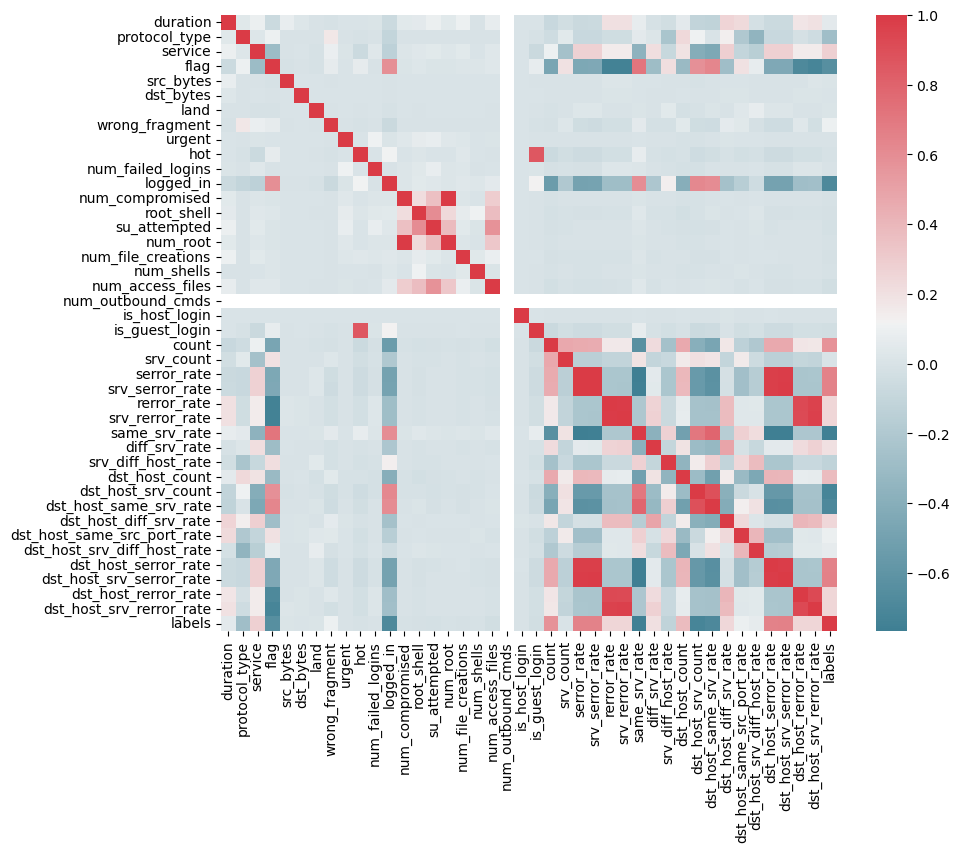

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,annot = False, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [ ]:
 xgb = XGBClassifier(
        n_estimators= 100,
        use_label_encoder= False,
        max_depth= 8,
        booster= 'gbtree',
        tree_method= 'gpu_hist',
        subsample= 0.5,
        colsample_bytree= 0.5,
        importance_type= 'gain',
        objective='binary:logistic',
        eval_metric='logloss',
        predictor= 'gpu_predictor',
    )

xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

noopt_df = pd.DataFrame(data=[[
        'nslkdd-binary',
        'xgb-no-opt',
        X_train.shape,
        X_val.shape,
        X_test.shape,
        round(roc_auc_score(y_true=y_test, y_score=xgb_preds),4),
        round(precision_score(y_true=y_test, y_pred=xgb_preds), 4),
        round(recall_score(y_true=y_test, y_pred=xgb_preds), 4),
        round(f1_score(y_true=y_test, y_pred=xgb_preds), 4)
    ]], columns=['AtkCls', 'model', 'TrainShape', 'ValShape', 'TestShape', 'Auroc', 'Precision', 'Recall', 'F1'])

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
noopt_df

,AtkCls,model,TrainShape,ValShape,TestShape,Auroc,Precision,Recall,F1
0,nslkdd-binary,xgb-no-opt,"(91015, 41)","(16062, 41)","(22544, 41)",0.9321,0.9907,0.8726,0.9279


In [ ]:
xgb = XGBClassifier(
        early_stopping_rounds=None, # Don't stop early, there is friction here between XGB API and SKL API
        # you would need eval_set=[(X_val, y_val)], but that does not work and depending on the implementation may
        # contribute to an over-optimistic estimate of performance
        use_label_encoder= False,
        colsample_bylevel=1,
        colsample_bynode=1,
        max_bin=256,
        booster= 'gbtree',
        tree_method= 'gpu_hist',
        importance_type='gain',
        objective='binary:logistic',
        eval_metric='logloss',
        predictor='gpu_predictor',
        verbosity=0,
        silent=True)

p_grid = {
        "colsample_bytree": uniform(0.4, 0.4),
        "gamma": uniform(0, 0.5),
        "learning_rate": uniform(0.03, 0.2),
        "max_depth": randint(2, 8),
        "subsample": uniform(0.4, 0.4)
}

search = RandomizedSearchCV(xgb,
                            param_distributions=p_grid,
                            random_state=None,
                            n_iter=200,
                            scoring='f1',
                            cv=KFold(n_splits=5, shuffle=False),
                            verbose=False)

search.fit(X_train, y_train)
search.best_params_

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

{'colsample_bytree': 0.548586327260208,
 'gamma': 0.14563630529756694,
 'learning_rate': 0.22075214390228157,
 'max_depth': 7,
 'subsample': 0.5731487686167555}

In [ ]:
xgb_search_preds = search.predict(X_test)
search_df = pd.DataFrame(data=[[
        'nslkdd-binary',
        'xgb-search',
        X_train.shape,
        X_val.shape,
        X_test.shape,
        round(roc_auc_score(y_true=y_test, y_score=xgb_search_preds),4),
        round(precision_score(y_true=y_test, y_pred=xgb_search_preds), 4),
        round(recall_score(y_true=y_test, y_pred=xgb_search_preds), 4),
        round(f1_score(y_true=y_test, y_pred=xgb_search_preds), 4)
    ]], columns=['AtkCls', 'model', 'TrainShape', 'ValShape', 'TestShape', 'Auroc', 'Precision', 'Recall', 'F1'])
search_df

,AtkCls,model,TrainShape,ValShape,TestShape,Auroc,Precision,Recall,F1
0,nslkdd-binary,xgb-search,"(91015, 41)","(16062, 41)","(22544, 41)",0.9304,0.9906,0.869,0.9258


In [ ]:
single_feature_preds = []
for f in X_train.columns:
    xgb = XGBClassifier(
        n_estimators= 3,
        use_label_encoder= False,
        max_depth= 2,
        booster= 'gbtree',
        tree_method= 'gpu_hist',
        subsample= 0.5,
        colsample_bytree= 1.0,
        importance_type= 'gain',
        objective='binary:logistic',
        eval_metric='logloss',
        predictor= 'gpu_predictor',
    )

    xgb.fit(X_train[f], y_train)
    xgb_preds = xgb.predict(X_test[f])
    if roc_auc_score(y_true=y_test, y_score=xgb_preds) > 0.5:
        single_feature_preds.append(xgb_preds)
len(single_feature_preds)

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0

30

In [ ]:
ensemble_preds = np.mean(np.vstack(single_feature_preds), axis=0)
ensemble_preds.shape, y_test.shape

((22544,), (22544,))

In [ ]:
one_feature_xgb_ensemble = pd.DataFrame(data=[[
        'nslkdd-binary',
        'single-feature-xgb-ensemble-nothresh',
        X_train.shape,
        X_val.shape,
        X_test.shape,
        round(roc_auc_score(y_true=y_test, y_score=ensemble_preds),4),
        round(precision_score(y_true=y_test, y_pred=np.rint(ensemble_preds)), 4),
        round(recall_score(y_true=y_test, y_pred=np.rint(ensemble_preds)), 4),
        round(f1_score(y_true=y_test, y_pred=np.rint(ensemble_preds)), 4)
    ]], columns=['AtkCls', 'model', 'TrainShape', 'ValShape', 'TestShape', 'Auroc', 'Precision', 'Recall', 'F1'])
one_feature_xgb_ensemble

,AtkCls,model,TrainShape,ValShape,TestShape,Auroc,Precision,Recall,F1
0,nslkdd-binary,single-feature-xgb-ensemble-nothresh,"(91015, 41)","(16062, 41)","(22544, 41)",0.9611,0.9992,0.6355,0.7768


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ensemble_preds)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print("Best threshold", round(best_thresh, 3))

Best threshold 0.233


In [ ]:
thresh_one_feature_xgb_ensemble = pd.DataFrame(data=[[
        'nslkdd-binary',
        'single-feature-xgb-ensemble-thresh',
        X_train.shape,
        X_val.shape,
        X_test.shape,
        round(roc_auc_score(y_true=y_test, y_score=ensemble_preds),4),
        round(precision_score(y_true=y_test, y_pred=np.where(ensemble_preds > best_thresh, 1, 0)), 4),
        round(recall_score(y_true=y_test, y_pred=np.where(ensemble_preds > best_thresh, 1, 0)), 4),
        round(f1_score(y_true=y_test, y_pred=np.where(ensemble_preds > best_thresh, 1, 0)), 4)
    ]], columns=['AtkCls', 'model', 'TrainShape', 'ValShape', 'TestShape', 'Auroc', 'Precision', 'Recall', 'F1'])
thresh_one_feature_xgb_ensemble


,AtkCls,model,TrainShape,ValShape,TestShape,Auroc,Precision,Recall,F1
0,nslkdd-binary,single-feature-xgb-ensemble-thresh,"(91015, 41)","(16062, 41)","(22544, 41)",0.9611,0.901,0.857,0.8784


In [ ]:
xgb = XGBClassifier(
        n_estimators= 100,
        use_label_encoder= False,
        max_depth= 8,
        booster= 'gbtree',
        tree_method= 'gpu_hist',
        subsample= 0.5,
        colsample_bytree= 0.5,
        importance_type= 'gain',
        objective='binary:logistic',
        eval_metric='logloss',
        predictor= 'gpu_predictor',
    )

xgb.fit(X_train, y_train)
xgb_proba_preds = xgb.predict_proba(X_test)

C:\Users\Yessine Zghal\miniconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
xgb_proba_preds = xgb_proba_preds[:,1]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba_preds)
print(len(thresholds))
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print("Best threshold", best_thresh)

3418
Best threshold 0.0049706316


In [ ]:
proba_thresh_df = pd.DataFrame(data=[[
        'nslkdd-binary',
        'xgb-no-opt-proba-thresh',
        X_train.shape,
        X_val.shape,
        X_test.shape,
        round(roc_auc_score(y_true=y_test, y_score=xgb_proba_preds),4),
        round(precision_score(y_true=y_test, y_pred=np.where(xgb_proba_preds > best_thresh, 1, 0)), 4),
        round(recall_score(y_true=y_test, y_pred=np.where(xgb_proba_preds > best_thresh, 1, 0)), 4),
        round(f1_score(y_true=y_test, y_pred=np.where(xgb_proba_preds > best_thresh, 1, 0)), 4)
    ]], columns=['AtkCls', 'model', 'TrainShape', 'ValShape', 'TestShape', 'Auroc', 'Precision', 'Recall', 'F1'])
proba_thresh_df

,AtkCls,model,TrainShape,ValShape,TestShape,Auroc,Precision,Recall,F1
0,nslkdd-binary,xgb-no-opt-proba-thresh,"(91015, 41)","(16062, 41)","(22544, 41)",0.991,0.976,0.9471,0.9613


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91015 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        91015 non-null  int64  
 1   diff_srv_rate                91015 non-null  float64
 2   dst_bytes                    91015 non-null  int64  
 3   dst_host_count               91015 non-null  int64  
 4   dst_host_diff_srv_rate       91015 non-null  float64
 5   dst_host_rerror_rate         91015 non-null  float64
 6   dst_host_same_src_port_rate  91015 non-null  float64
 7   dst_host_same_srv_rate       91015 non-null  float64
 8   dst_host_serror_rate         91015 non-null  float64
 9   dst_host_srv_count           91015 non-null  int64  
 10  dst_host_srv_diff_host_rate  91015 non-null  float64
 11  dst_host_srv_rerror_rate     91015 non-null  float64
 12  dst_host_srv_serror_rate     91015 non-null  float64
 13  duration       

# FCN


In [ ]:
df_train = x_kb.copy()

In [ ]:
df_train.head()

,wrong_fragment,urgent,su_attempted,srv_serror_rate,srv_rerror_rate,srv_diff_host_rate,srv_count,src_bytes,service,serror_rate,...,root_shell,rerror_rate,protocol_type,num_shells,num_root,num_outbound_cmds,num_file_creations,num_failed_logins,num_compromised,labels
0,0,0,0,0.0,0.0,0.00,2,491,20.0,0.0,...,0,0.0,1.0,0,0,0,0,0,0,normal
1,0,0,0,0.0,0.0,0.00,1,146,44.0,0.0,...,0,0.0,2.0,0,0,0,0,0,0,normal
2,0,0,0,1.0,0.0,0.00,6,0,49.0,1.0,...,0,0.0,1.0,0,0,0,0,0,0,neptune
3,0,0,0,0.2,0.0,0.00,5,232,24.0,0.2,...,0,0.0,1.0,0,0,0,0,0,0,normal
4,0,0,0,0.0,0.0,0.09,32,199,24.0,0.0,...,0,0.0,1.0,0,0,0,0,0,0,normal


In [ ]:
def change_label(df):
    df.labels.replace(['back','land','neptune','pod','smurf','teardrop'],'Dos',inplace=True)
    df.labels.replace(['guess_passwd','imap','ftp_write','multihop','phf','spy','warezclient','warezmaster'],'R2L',inplace=True)
    df.labels.replace(['ipsweep','nmap','portsweep','satan'],'Probe',inplace=True)
    df.labels.replace(['buffer_overflow','loadmodule','perl','rootkit'],'U2R',inplace=True)
change_label(df_train)

In [ ]:
df_train.labels.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64

In [ ]:
multi_data = df_train.copy()
multi_label = pd.DataFrame(multi_data.labels)

In [ ]:
multi_data.columns

Index(['wrong_fragment', 'urgent', 'su_attempted', 'srv_serror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes',
       'service', 'serror_rate', 'same_srv_rate', 'root_shell', 'rerror_rate',
       'protocol_type', 'num_shells', 'num_root', 'num_outbound_cmds',
       'num_file_creations', 'num_failed_logins', 'num_compromised', 'labels'],
      dtype='object')

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data.columns

Index(['wrong_fragment', 'urgent', 'su_attempted', 'srv_serror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes',
       'service', 'serror_rate', 'same_srv_rate', 'root_shell', 'rerror_rate',
       'protocol_type', 'num_shells', 'num_root', 'num_outbound_cmds',
       'num_file_creations', 'num_failed_logins', 'num_compromised', 'labels',
       'intrusion'],
      dtype='object')

In [ ]:
multi_data.drop(labels= ['labels'], axis=1, inplace=True)
multi_data

,wrong_fragment,urgent,su_attempted,srv_serror_rate,srv_rerror_rate,srv_diff_host_rate,srv_count,src_bytes,service,serror_rate,...,root_shell,rerror_rate,protocol_type,num_shells,num_root,num_outbound_cmds,num_file_creations,num_failed_logins,num_compromised,intrusion
0,-0.089486,-0.007736,-0.024437,-0.631929,-0.374432,-0.374560,-0.354343,-0.007679,-0.686785,-0.637209,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
1,-0.089486,-0.007736,-0.024437,-0.631929,-0.374432,-0.374560,-0.368110,-0.007737,0.781428,-0.637209,...,-0.036652,-0.374362,2.219312,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
2,-0.089486,-0.007736,-0.024437,1.605104,-0.374432,-0.374560,-0.299273,-0.007762,1.087305,1.602664,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,0
3,-0.089486,-0.007736,-0.024437,-0.184522,-0.374432,-0.374560,-0.313041,-0.007723,-0.442083,-0.189235,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
4,-0.089486,-0.007736,-0.024437,-0.631929,-0.374432,-0.028179,0.058678,-0.007728,-0.442083,-0.637209,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.089486,-0.007736,-0.024437,1.605104,-0.374432,-0.374560,-0.037694,-0.007762,1.087305,1.602664,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,0
125969,-0.089486,-0.007736,-0.024437,-0.631929,-0.374432,-0.374560,-0.354343,-0.007744,1.087305,-0.637209,...,-0.036652,-0.374362,2.219312,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
125970,-0.089486,-0.007736,-0.024437,-0.631929,-0.374432,-0.374560,-0.368110,-0.007382,1.393183,-0.637209,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,4
125971,-0.089486,-0.007736,-0.024437,1.605104,-0.374432,-0.374560,-0.271739,-0.007762,-0.075030,1.602664,...,-0.036652,-0.374362,-0.124706,-0.01861,-0.012385,0.0,-0.02618,-0.027023,-0.011664,0


In [ ]:
multi_data.columns

Index(['wrong_fragment', 'urgent', 'su_attempted', 'srv_serror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes',
       'service', 'serror_rate', 'same_srv_rate', 'root_shell', 'rerror_rate',
       'protocol_type', 'num_shells', 'num_root', 'num_outbound_cmds',
       'num_file_creations', 'num_failed_logins', 'num_compromised',
       'intrusion'],
      dtype='object')

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service'],prefix="",prefix_sep="")
multi_data

KeyError: ignored

In [ ]:
y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 20) 
y_train has shape: (125973, 1)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(100778, 20, 1)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(25195, 20, 1)

In [ ]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train_multi.shape[1], 1), activation='relu'))
model.add(Conv1D(64, 3, padding="same", activation='relu'))

model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 64)            24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                    

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 16s 855ms/step - loss: 0.9551 - accuracy: 0.7511 - val_loss: 0.4471 - val_accuracy: 0.8695
Epoch 2/100
17/17 [==============================] - 15s 896ms/step - loss: 0.4059 - accuracy: 0.8867 - val_loss: 0.2821 - val_accuracy: 0.9253
Epoch 3/100
17/17 [==============================] - 13s 751ms/step - loss: 0.2887 - accuracy: 0.9183 - val_loss: 0.2398 - val_accuracy: 0.9326
Epoch 4/100
17/17 [==============================] - 13s 753ms/step - loss: 0.2497 - accuracy: 0.9262 - val_loss: 0.2195 - val_accuracy: 0.9369
Epoch 5/100
17/17 [==============================] - 13s 747ms/step - loss: 0.2264 - accuracy: 0.9307 - val_loss: 0.1986 - val_accuracy: 0.9421
Epoch 6/100
17/17 [==============================] - 13s 752ms/step - loss: 0.2088 - accuracy: 0.9354 - val_loss: 0.1844 - val_accuracy: 0.9485
Epoch 7/100
17/17 [==============================] - 15s 921ms/step - loss: 0.1966 - accuracy: 0.9387 - val_loss: 0.1740 - val_accuracy:

In [ ]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

788/788 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9945
Test results - Loss: 0.02128329873085022 - Accuracy: 99.44830536842346%


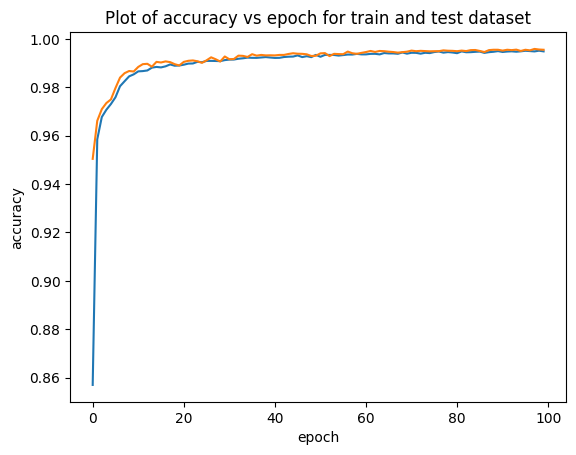

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

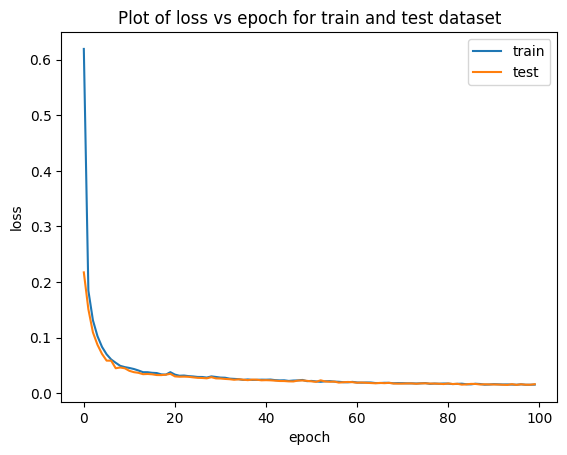

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

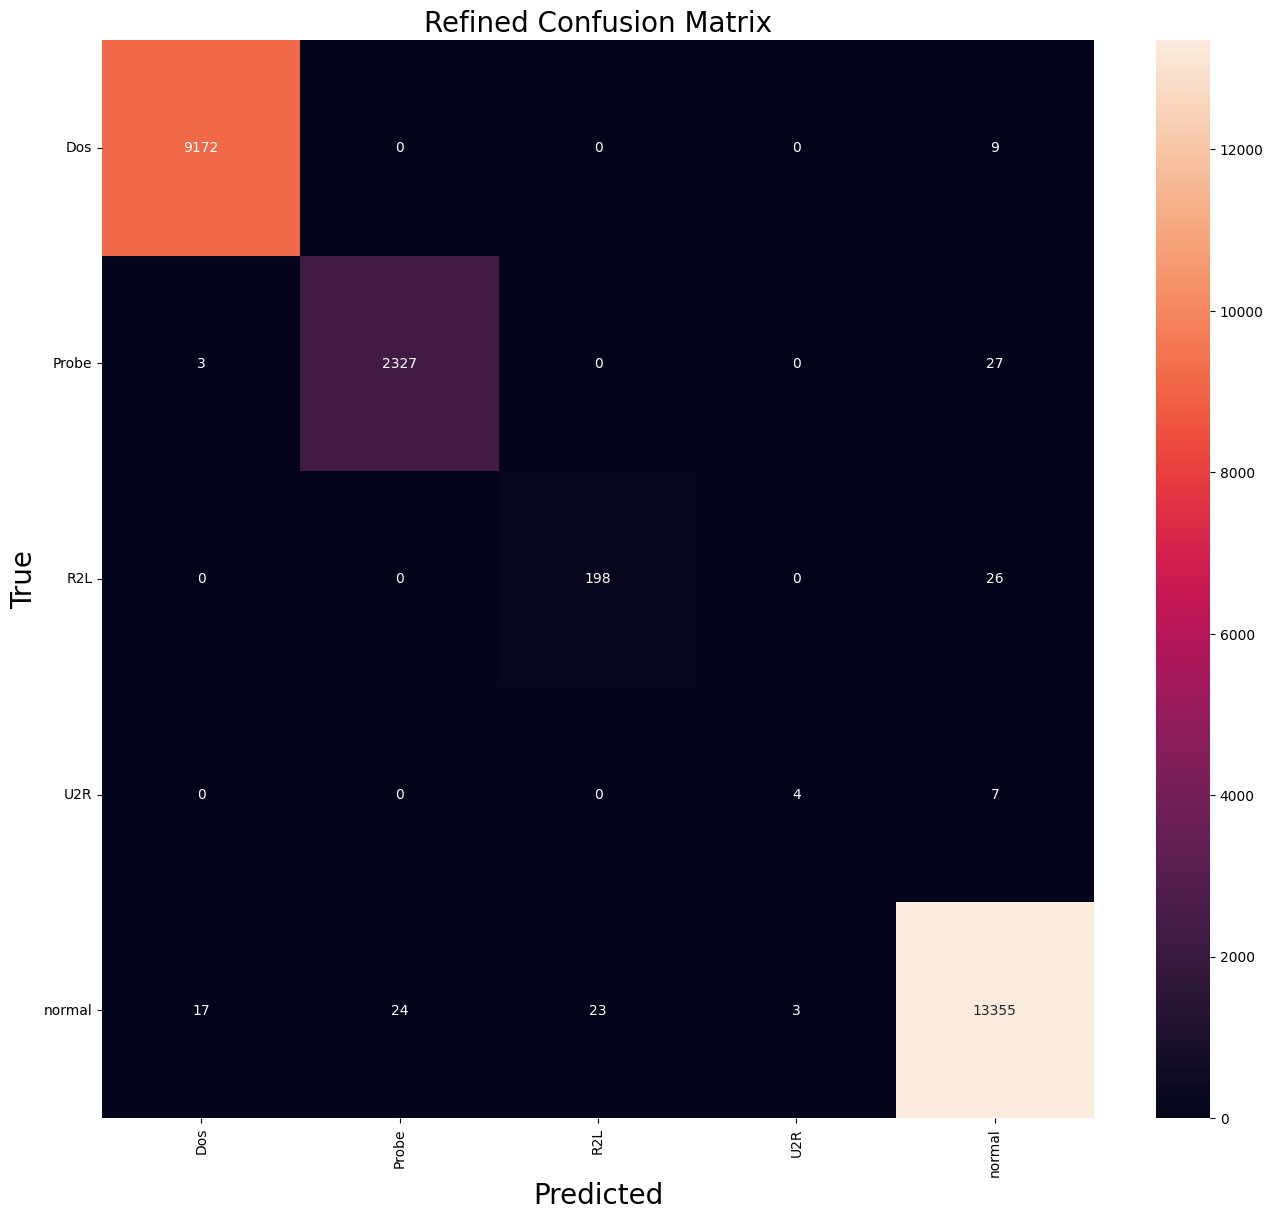

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test, steps=len(X_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
labels = le2.classes_
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_model(hp):
    model = Sequential() # initializing model
    # input layer and first layer with 50 neurons
    model.add(Conv1D(128, 3, padding="same",input_shape = (X_train_multi.shape[1], 1), activation='relu'))
    model.add(Conv1D(64, 3, padding="same", activation='relu'))

    model.add(MaxPool1D(pool_size=(2)))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 3, padding="same", activation='relu'))
    model.add(MaxPool1D(pool_size=(2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=128)))
    # output layer with softmax activation
    model.add(Dense(units=5,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])), metrics=['accuracy'])



    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
tuner.search_space_summary()


Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=100 , batch_size=5000,validation_split=0.2)


Trial 4 Complete [00h 41m 43s]
val_accuracy: 0.9910696546236674

Best val_accuracy So Far: 0.9964278737703959
Total elapsed time: 01h 10m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()


Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.9964278737703959
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.9956836700439453
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.0001
Score: 0.9910696546236674
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.990573525428772


In [ ]:
model_op = Sequential() # initializing model
# input layer and first layer with 50 neurons
model_op.add(Conv1D(128, 3, padding="same",input_shape = (X_train_multi.shape[1], 1), activation='relu'))
model_op.add(Conv1D(64, 3, padding="same", activation='relu'))

model_op.add(MaxPool1D(pool_size=(2)))
model_op.add(Dropout(0.2))
model_op.add(Conv1D(64, 3, padding="same", activation='relu'))
model_op.add(MaxPool1D(pool_size=(2)))
model_op.add(Dropout(0.2))
model_op.add(Flatten())
model_op.add(Dense(units=32))
# output layer with softmax activation
model_op.add(Dense(units=5,activation='softmax'))

In [ ]:
model_op.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
historyy = model_op.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 5s 227ms/step - loss: 0.4819 - accuracy: 0.8453 - val_loss: 0.1573 - val_accuracy: 0.9633
Epoch 2/100
17/17 [==============================] - 4s 218ms/step - loss: 0.1251 - accuracy: 0.9675 - val_loss: 0.0873 - val_accuracy: 0.9726
Epoch 3/100
17/17 [==============================] - 4s 219ms/step - loss: 0.0813 - accuracy: 0.9743 - val_loss: 0.0551 - val_accuracy: 0.9815
Epoch 4/100
17/17 [==============================] - 4s 220ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 5/100
17/17 [==============================] - 4s 224ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 6/100
17/17 [==============================] - 4s 222ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0403 - val_accuracy: 0.9873
Epoch 7/100
17/17 [==============================] - 4s 245ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0331 - val_accuracy: 0.9900

Epoch 58/100
17/17 [==============================] - 5s 299ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 59/100
17/17 [==============================] - 5s 300ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0170 - val_accuracy: 0.9945
Epoch 60/100
17/17 [==============================] - 5s 304ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0139 - val_accuracy: 0.9953
Epoch 61/100
17/17 [==============================] - 5s 295ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0142 - val_accuracy: 0.9955
Epoch 62/100
17/17 [==============================] - 5s 285ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0137 - val_accuracy: 0.9954
Epoch 63/100
17/17 [==============================] - 6s 328ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0139 - val_accuracy: 0.9953
Epoch 64/100
17/17 [==============================] - 5s 310ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0143 - val_accuracy:

In [ ]:
# predicting target attribute on testing dataset
test_resultss = model_op.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_resultss[0]} - Accuracy: {test_resultss[1]*100}%')

788/788 [==============================] - 2s 3ms/step - loss: 0.0195 - accuracy: 0.9939
Test results - Loss: 0.01953158713877201 - Accuracy: 99.38876628875732%


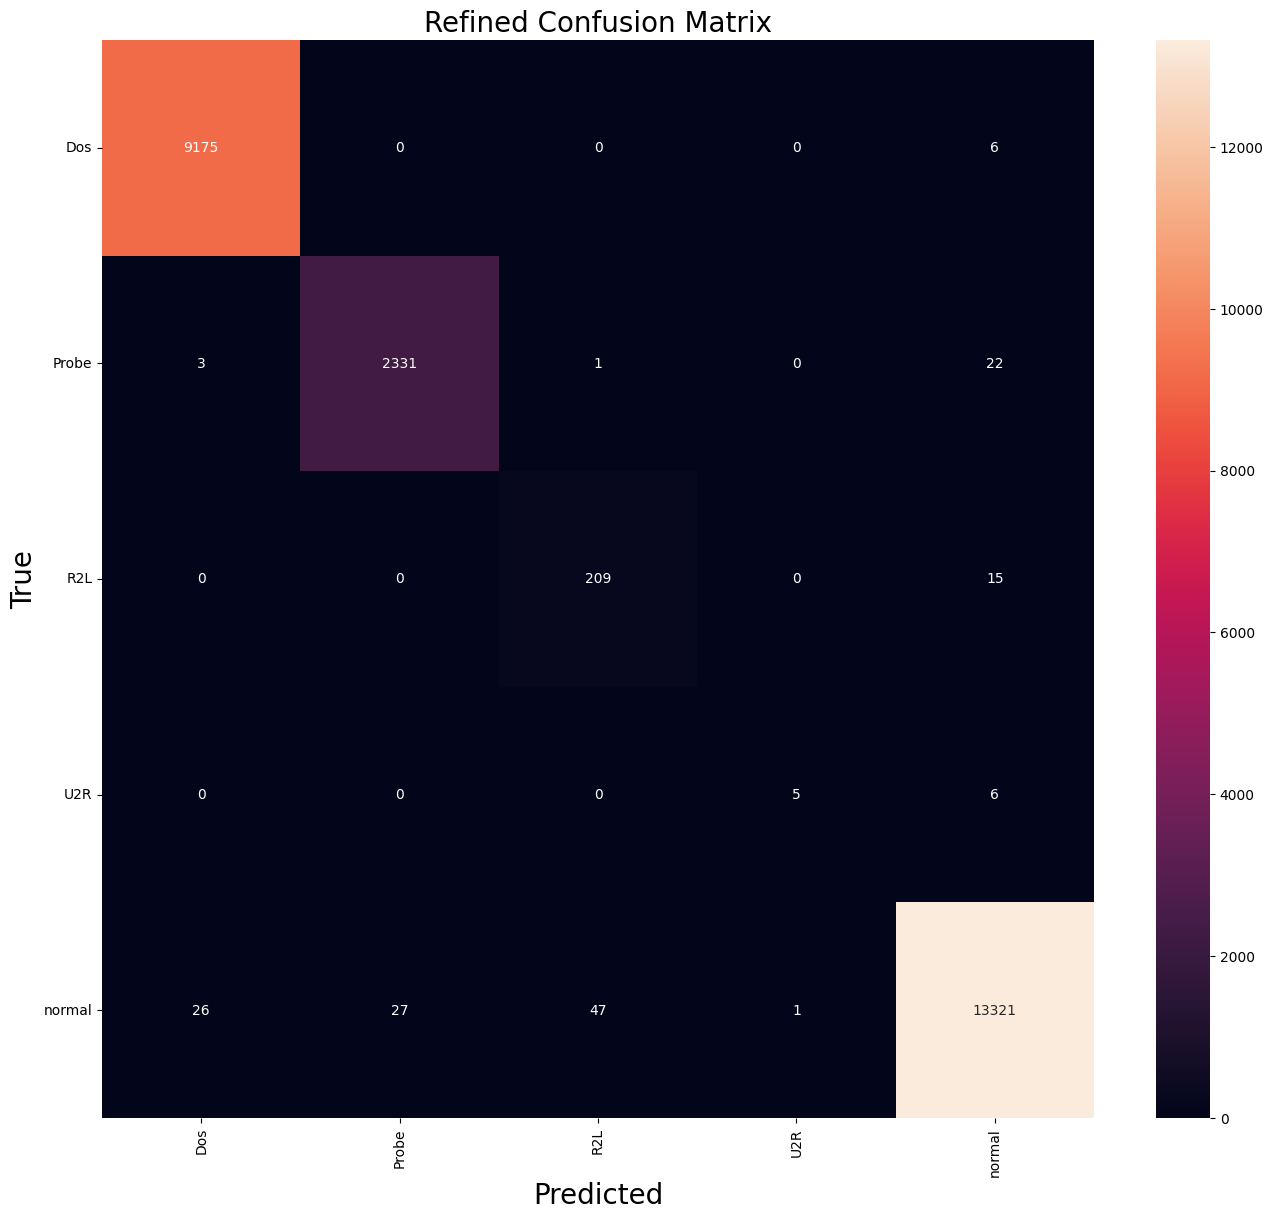

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model_op.predict(X_test, steps=len(X_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
labels = le2.classes_
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

# CNN

In [ ]:
model1 = Sequential() # initializing model
# input layer and first layer with 50 neurons
model1.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model1.add(MaxPool1D(pool_size=(4)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, 3, padding="same", activation='relu'))
model1.add(MaxPool1D(pool_size=(4)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(units=50))
# output layer with softmax activation
model1.add(Dense(units=6,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 122, 32)           128       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 30, 32)            3104      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 224)             

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 2s 81ms/step - loss: 1.3015 - accuracy: 0.5567 - val_loss: 0.8919 - val_accuracy: 0.8029
Epoch 2/100
17/17 [==============================] - 1s 37ms/step - loss: 0.7490 - accuracy: 0.8050 - val_loss: 0.5092 - val_accuracy: 0.8633
Epoch 3/100
17/17 [==============================] - 1s 37ms/step - loss: 0.4641 - accuracy: 0.8723 - val_loss: 0.3198 - val_accuracy: 0.9170
Epoch 4/100
17/17 [==============================] - 1s 37ms/step - loss: 0.3300 - accuracy: 0.9067 - val_loss: 0.2408 - val_accuracy: 0.9298
Epoch 5/100
17/17 [==============================] - 1s 37ms/step - loss: 0.2704 - accuracy: 0.9226 - val_loss: 0.2006 - val_accuracy: 0.9454
Epoch 6/100
17/17 [==============================] - 1s 36ms/step - loss: 0.2314 - accuracy: 0.9335 - val_loss: 0.1719 - val_accuracy: 0.9562
Epoch 7/100
17/17 [==============================] - 1s 36ms/step - loss: 0.2031 - accuracy: 0.9426 - val_loss: 0.1535 - val_accuracy: 0.9621
Epoch 